In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

weatherDF = pd.read_csv("Weather Dataset.csv").drop_duplicates() 
# print(weatherDF.describe()) # used this line to get info of min and mix values of each column

In [24]:
# FILTER SECTION -->
# making logical limits for each column which have abnormal values within (by using internet to search max and min limits)
# filteration & dropping a whole corrupted inlogical column (Loud Cover)
fWeatherDF = weatherDF[
    (weatherDF["Pressure (millibars)"] >= 870.0)
    & (weatherDF["Visibility (km)"] >= 0)
    & (weatherDF["Humidity"] >= 0)
    & (weatherDF["Temperature (C)"] > -20)
]
fWeatherDF = fWeatherDF.drop(columns="Loud Cover")

# arranging the data based on the 'Formatted Date' column
fWeatherDF = fWeatherDF.sort_values(by="Formatted Date",ascending=True)

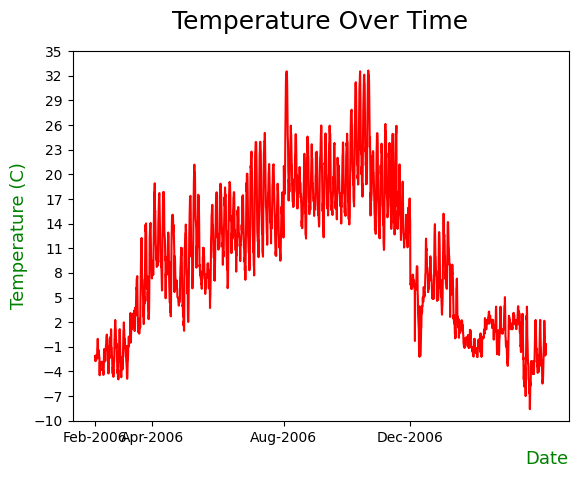

In [7]:
# PLOTTING SECTION --> Temperature over time
plt.plot(fWeatherDF["Formatted Date"],fWeatherDF["Temperature (C)"],color="r")
plt.xlabel("Date",color="g",loc="right",fontsize=13)
plt.ylabel("Temperature (C)",color="g",fontsize=13)
plt.ylim(-10,35)
plt.yticks(np.arange(-10,36,3))
xVals =np.array(["2006-02-01 00:00:00.000 +0100","2006-04-01 00:00:00.000 +0200","2006-08-01 00:00:00.000 +0200","2006-12-01 00:00:00.000 +0100"])
xTicks =np.array(["Feb-2006","Apr-2006","Aug-2006","Dec-2006"])
plt.xticks(ticks=xVals,labels=xTicks,)
plt.title("Temperature Over Time",fontsize=18,pad=16)
plt.show()

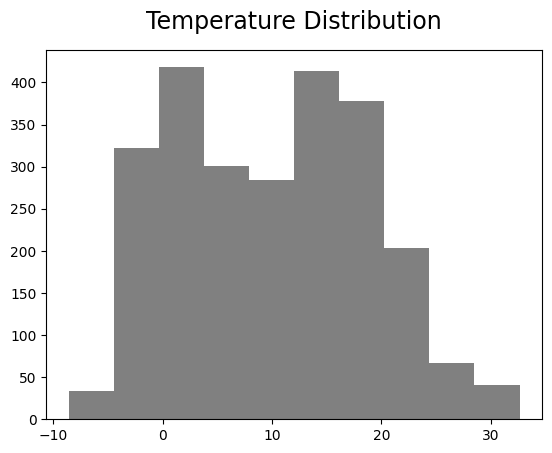

In [8]:
# temperature distribution histogram
plt.hist(fWeatherDF["Temperature (C)"],color='grey')
plt.title("Temperature Distribution",color='black',fontsize=17,pad=15)
plt.show()

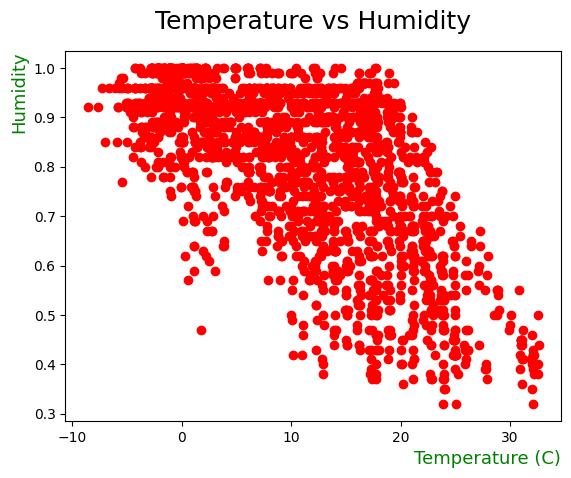

In [9]:
# temp vs humidity scatter
plt.scatter(fWeatherDF["Temperature (C)"],fWeatherDF["Humidity"],color="red")
plt.xlabel("Temperature (C)",color="g",fontsize=13,loc="right")
plt.ylabel("Humidity",color="g",fontsize=13,loc=("top"))
plt.title("Temperature vs Humidity",fontsize=18,pad=16)
plt.show()

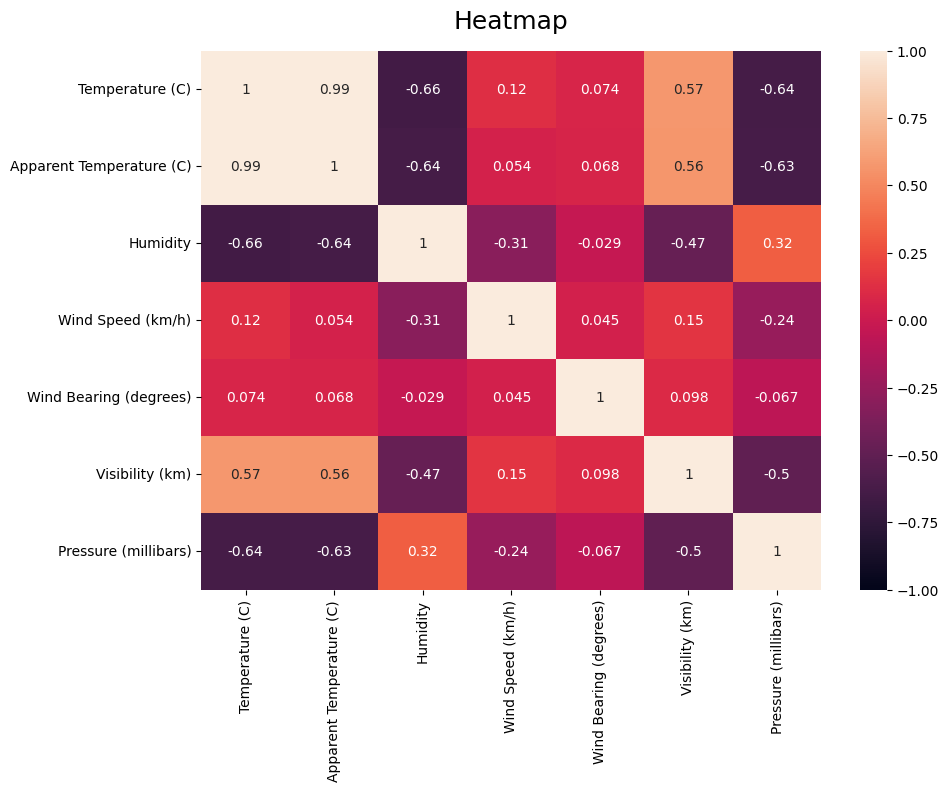

In [23]:
# correlation
plt.figure(figsize=[10,7])
correlation = (fWeatherDF.drop(columns=["Formatted Date","Summary","Precip Type","Daily Summary"])).corr()
plt.title("Correlation Heatmap",fontsize=18,pad=16)
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1)
plt.show()

### Heatmap explanation
    The shown Heatmap expresses the relation between between each two weather parameters and how they change together by the following:

- set of colors describe the correlations with range between:
        
> **Off White** or (1) --> positive correlation (if one changes, the other tends to change in the same direction)

> **Red** or (0) --> no correlation (the two parameters change separately)

> **Dark Purple** or (-1) --> negative correlation (if one changes, the other tends to change in the opposite direction)
#### Examples for Explanation
- Every parameter has a perfect **(1)** with itself as it's perfect correlation 
- Apparent Temperature has **(0.9)** nearly perfect with the temperature as it highly dependable on it
- Humidity has inverse correlation with Apparent Temp and Temp **(described as -0.66 & -0.64)** which is proven also by the previous scatter diagram
that when Temperature increase most of the Time Humidity decrease and vice versa.
- Also wind bearing (angle) doesn't depend on any parameter which is shown perfectly with correlation values with all other parameters ranges from **(0.067)** to **(0.098)** 

##### Overall, The previous examples should have made the reader the reader understand the correlation Heatmap clearly.